In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import  warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# CALIFORNIA HOUSING PRICE PREDICTION

# OVERVIEW DATASET

### Load data

In [2]:
data_link = 'https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv'

In [3]:
df = pd.read_csv(data_link)
print('Shape of data: ',df.shape)

Shape of data:  (20640, 10)


The provided data consists of over 20k observation with 10 column features.

### First few observations of data

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Features data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Almost of columns are numeric types, excepted ocean_proximity is object type.
* Prediction labels: median_house_value (numeric type)

### Check null values

In [9]:
df[df.isnull().any(axis=1)].count()

longitude             207
latitude              207
housing_median_age    207
total_rooms           207
total_bedrooms          0
population            207
households            207
median_income         207
median_house_value    207
ocean_proximity       207
dtype: int64

### Delete null values

In [50]:
df = df.dropna()

In [12]:
print('Shape of data: ',df.shape)

Shape of data:  (20433, 10)


Almost of columns except total_bedroom have 207 null values

### Features statistic summary

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
print('Feature ocean_proximity count: ', df['ocean_proximity'].count())
print('Fature ocean_proximity values: ')
df['ocean_proximity'].value_counts().to_frame()

Feature ocean_proximity count:  20640
Fature ocean_proximity values: 


,ocean_proximity
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


# Data visualization

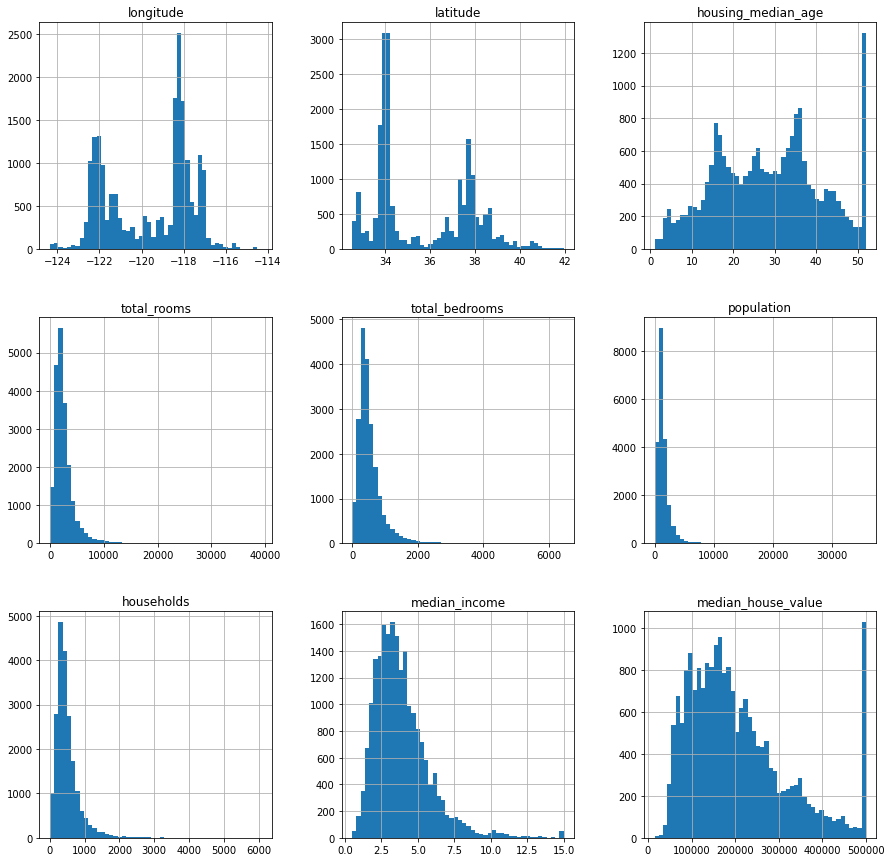

In [8]:
df.hist(figsize=(15,15),bins=50)
plt.show()

### Longitude and Latitude VS Price, Ocean proximity

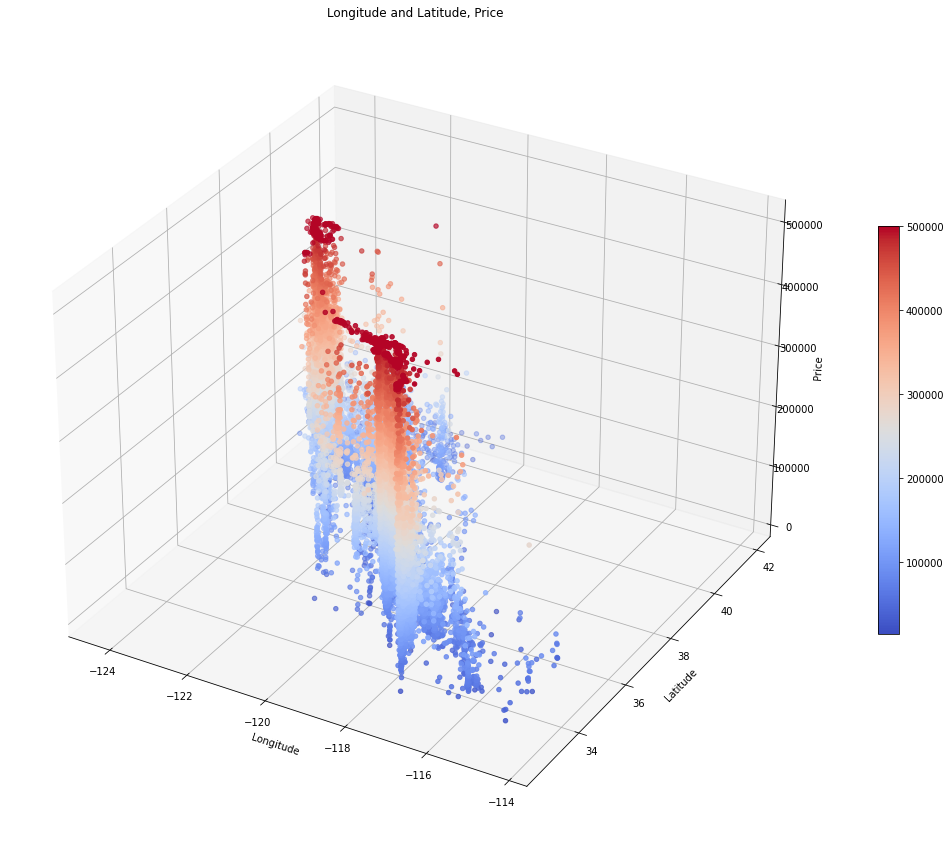

In [5]:
data_long_lat_price = df[['longitude','latitude','median_house_value']]
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(data_long_lat_price['longitude'],
            data_long_lat_price['latitude'],
            data_long_lat_price['median_house_value'],c=data_long_lat_price['median_house_value'],cmap=cm.coolwarm)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')
ax.set_title('Longitude and Latitude, Price')
fig.colorbar(p, shrink=0.5)
plt.show()

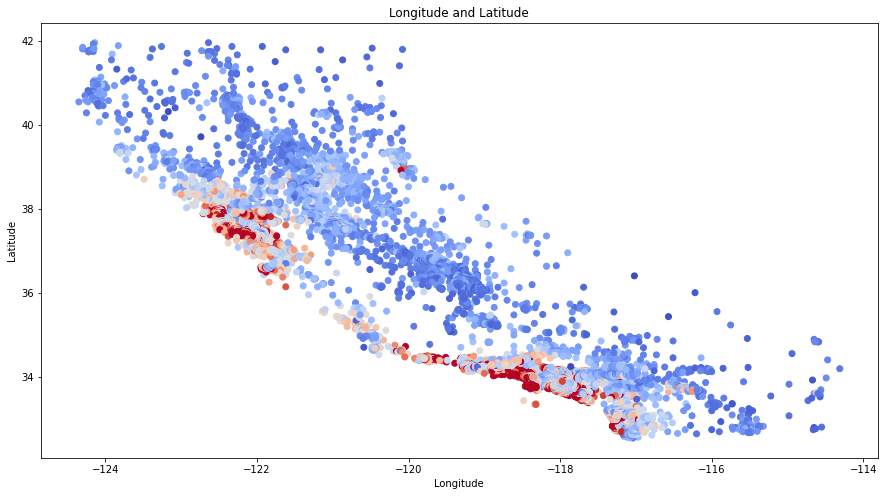

In [7]:
plt.figure(figsize=(15,8))
plt.scatter(data_long_lat_price['longitude'],data_long_lat_price['latitude'],c=data_long_lat_price['median_house_value'],cmap=cm.coolwarm)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude and Latitude')
plt.show()

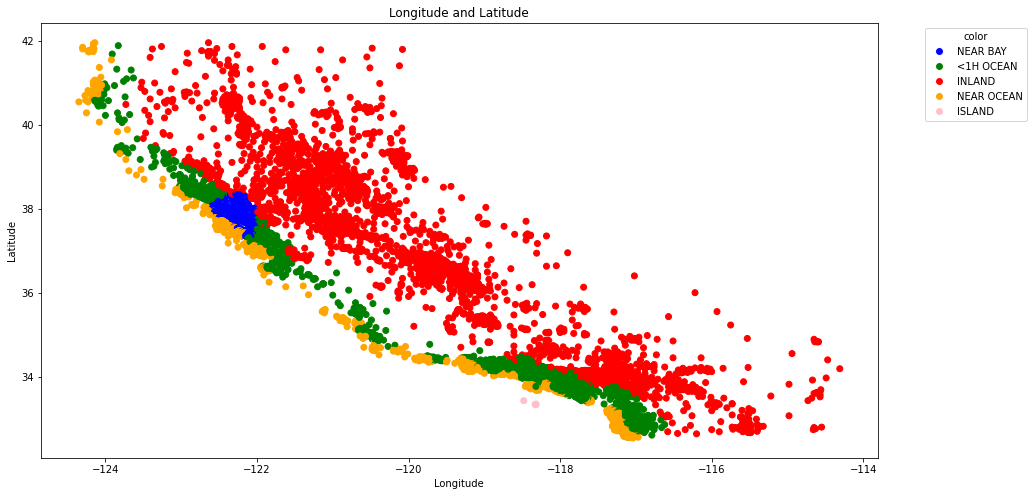

In [20]:
from matplotlib.lines import Line2D
data_long_lat_price = df[['longitude','latitude','ocean_proximity']]
fig,ax = plt.subplots(figsize=(15,8))
colors = {'NEAR BAY': 'blue','<1H OCEAN' : 'green', 'INLAND':'red','NEAR OCEAN':'orange','ISLAND':'pink'}
ax.scatter(data_long_lat_price['longitude'],data_long_lat_price['latitude'],c=data_long_lat_price['ocean_proximity'].map(colors))
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Longitude and Latitude')
plt.show()

### Ocean proximity VS Age, Household, Median income, Total bedrooms, Population, Total rooms.

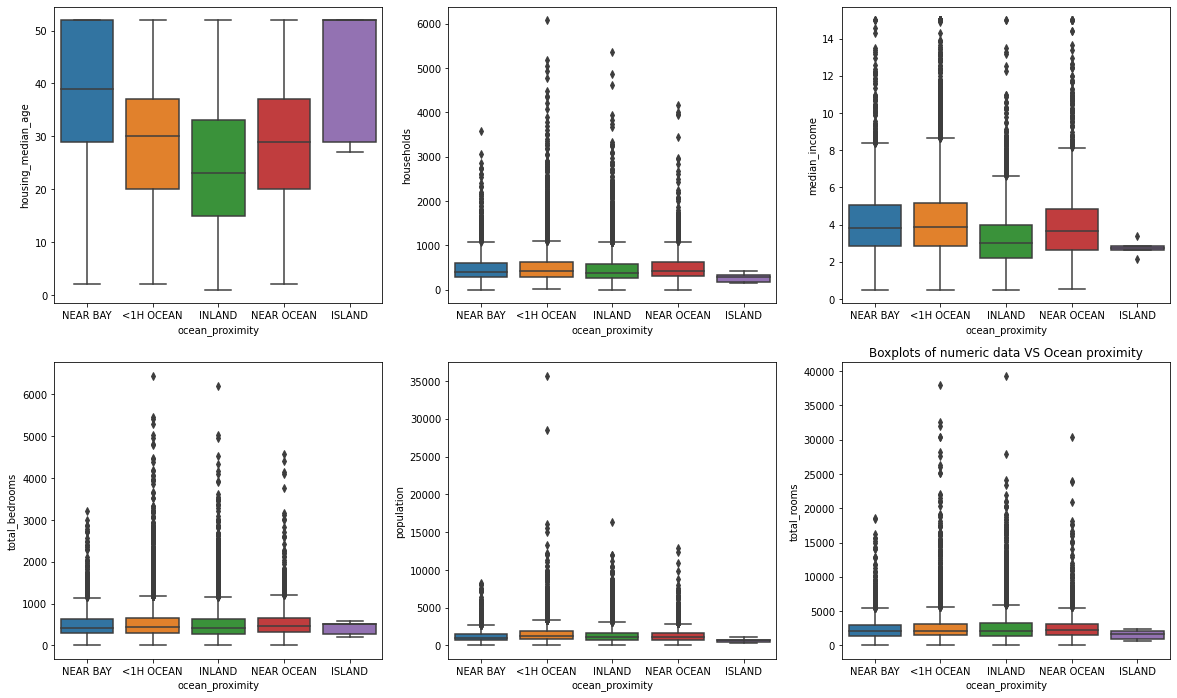

In [29]:
f, axes = plt.subplots(2, 3, figsize=(20, 12))
sns.boxplot(data= df, x='ocean_proximity',y='housing_median_age', ax=axes[0][0])
sns.boxplot(data= df, x='ocean_proximity',y='households', ax=axes[0][1])
sns.boxplot(data= df, x='ocean_proximity',y='median_income', ax=axes[0][2])
sns.boxplot(data= df, x='ocean_proximity',y='total_bedrooms', ax=axes[1][0])
sns.boxplot(data= df, x='ocean_proximity',y='population', ax=axes[1][1])
sns.boxplot(data= df, x='ocean_proximity',y='total_rooms', ax=axes[1][2])
plt.show()

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

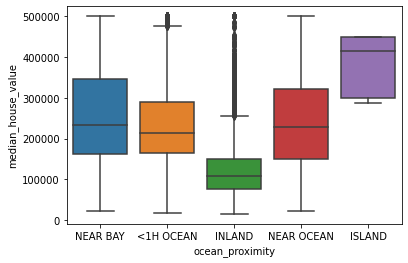

In [5]:
sns.boxplot(data= df, x='ocean_proximity',y='median_house_value')

### Age VS Price

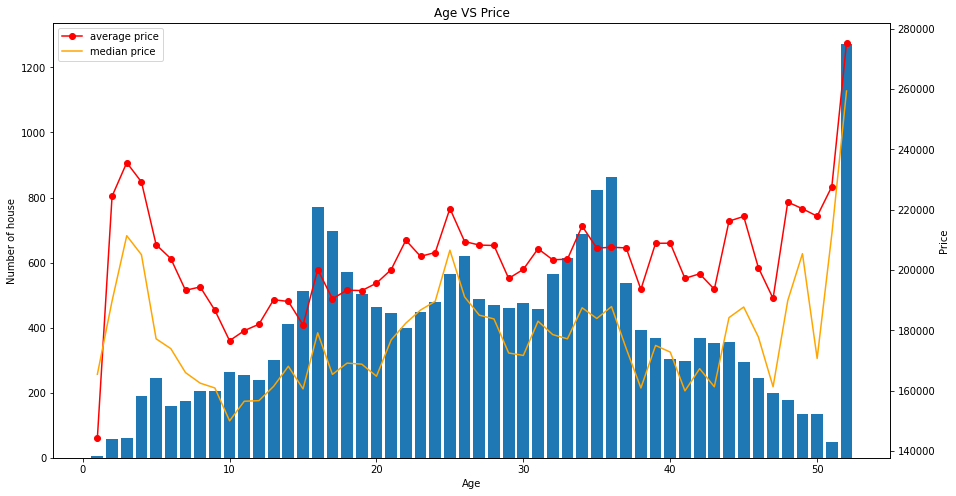

In [49]:
data_age_price = df[['housing_median_age','median_house_value']]
sta = data_age_price.groupby('housing_median_age').describe()
fig,ax = plt.subplots(figsize=(15,8))
ax.bar(sta.index,sta['median_house_value']['count'],label='number of houses')
ax.set_xlabel('Age')
ax.set_ylabel('Number of house')
ax2 = ax.twinx()
ax2.plot(sta.index,sta['median_house_value']['mean'],color='red',marker='o',label='average price')
ax2.plot(sta.index,sta['median_house_value']['50%'],color='orange',label='median price')
ax2.set_ylabel('Price')
plt.legend()
plt.title('Age VS Price')
plt.show()

### Regression plot

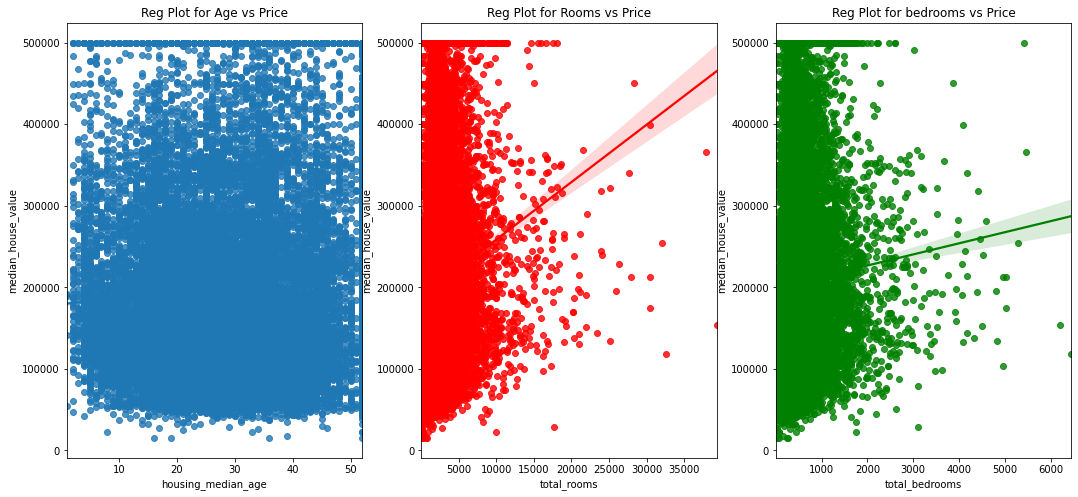

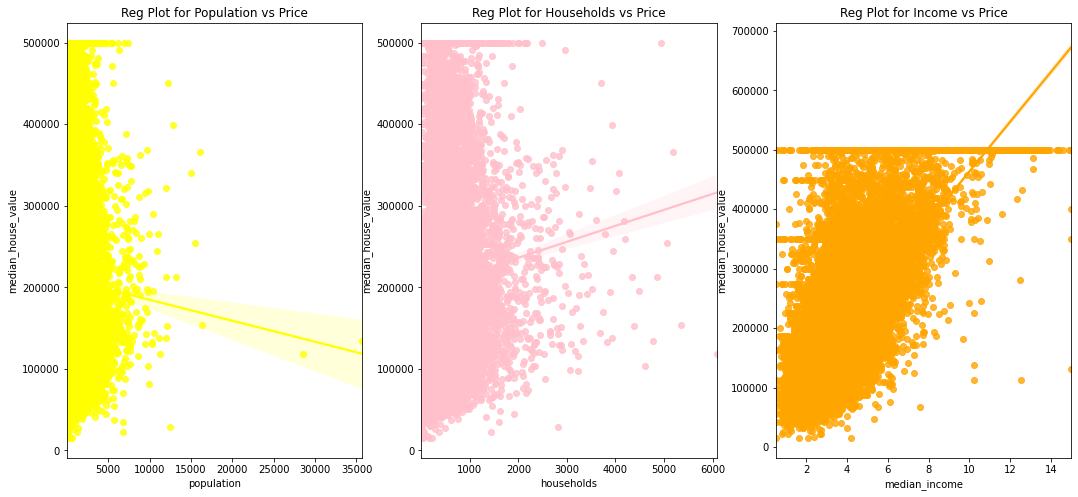

In [14]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=df, x='housing_median_age', y='median_house_value',ax=axes)
axes.set(title='Reg Plot for Age vs Price')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=df, x='total_rooms', y='median_house_value',ax=axes, color='r')
axes.set(title='Reg Plot for Rooms vs Price')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=df, x='total_bedrooms', y='median_house_value',ax=axes, color='g')
axes.set(title='Reg Plot for bedrooms vs Price')
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=df, x='population', y='median_house_value',ax=axes,color='yellow')
axes.set(title='Reg Plot for Population vs Price')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=df, x='households', y='median_house_value',ax=axes, color='pink')
axes.set(title='Reg Plot for Households vs Price')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=df, x='median_income', y='median_house_value',ax=axes, color='orange')
axes.set(title='Reg Plot for Income vs Price')
plt.show()

## Feature Selection

In [4]:
df['room_per_household'] = df['total_rooms']/df['households']
df['population_per_household'] = df['population']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

### Few detail

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  room_per_household        20640 non-null  float64
 11  population_per_household  20640 non-null  float64
 12  bedrooms_per_room         20433 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [107]:
new_3_features_df = df[['room_per_household','population_per_household','bedrooms_per_room']]
new_3_features_df.head()

,room_per_household,population_per_household,bedrooms_per_room
0,6.984127,2.555556,0.146591
1,6.238137,2.109842,0.155797
2,8.288136,2.802260,0.129516
3,5.817352,2.547945,0.184458
4,6.281853,2.181467,0.172096


In [26]:
new_3_features_df.describe()

,room_per_household,population_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000
mean,5.431344,3.071533,0.213039
std,2.482946,10.438269,0.057983
min,0.846154,0.692308,0.100000
25%,4.441441,2.429032,0.175427
50%,5.230769,2.817582,0.203162
75%,6.052381,3.281513,0.239821
max,141.909091,1243.333333,1.000000


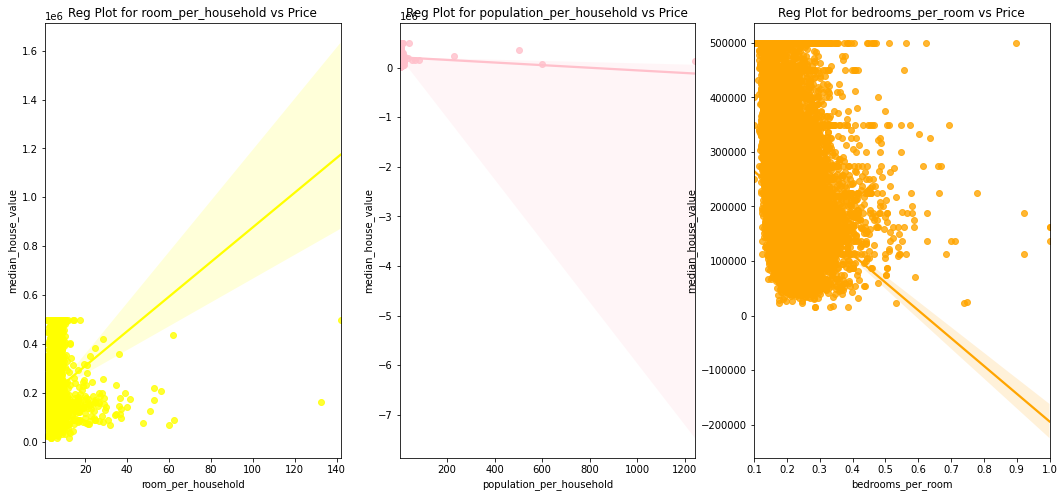

In [108]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=df, x='room_per_household', y='median_house_value',ax=axes,color='yellow')
axes.set(title='Reg Plot for room_per_household vs Price')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=df, x='population_per_household', y='median_house_value',ax=axes, color='pink')
axes.set(title='Reg Plot for population_per_household vs Price')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=df, x='bedrooms_per_room', y='median_house_value',ax=axes, color='orange')
axes.set(title='Reg Plot for bedrooms_per_room vs Price')
plt.show()

### Remove outliers

In [5]:
df=df.loc[(df['median_house_value']!=500001)|(df['median_income']>=2)]
df=df[df['median_income']<=11].reset_index(drop=True)
df=df[(df['median_house_value']!=350000) |(df['median_income']>=1.5)].reset_index(drop=True)
df=df[(df['median_house_value']!=450000) | (df['median_income']>=2)].reset_index(drop=True)
df=df[(df['median_house_value']>=350000) | (df['median_income']<=9.5)].reset_index(drop=True)
df=df[df['population']<=9000]
df=df[(df['population_per_household']>=1.15) & (df['population_per_household']<=6.5)]
df=df[df['room_per_household']<20]
df=df[df['bedrooms_per_room']<0.5].reset_index(drop=True)

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,population_per_household,bedrooms_per_room
count,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000
mean,-119.573910,35.633614,28.657797,2610.731119,534.133640,1410.677053,497.638742,3.808978,204595.533260,5.326959,2.910013,0.212199
std,2.006903,2.137944,12.521150,1983.907140,391.703216,1002.611200,354.760339,1.707593,112895.566363,1.384836,0.729200,0.052203
min,-124.350000,32.540000,1.000000,6.000000,2.000000,5.000000,2.000000,0.499900,14999.000000,1.640000,1.161290,0.100000
25%,-121.800000,33.930000,18.000000,1461.000000,298.000000,794.000000,283.000000,2.568200,118800.000000,4.443629,2.428571,0.175976
50%,-118.500000,34.260000,29.000000,2130.000000,437.000000,1170.000000,412.000000,3.531300,179000.000000,5.221394,2.816235,0.203406
75%,-118.000000,37.720000,37.000000,3141.000000,647.000000,1723.000000,606.000000,4.718800,262100.000000,6.020008,3.276710,0.239575
max,-114.310000,41.950000,52.000000,24121.000000,5419.000000,8997.000000,4930.000000,10.980500,500001.000000,19.962121,6.497585,0.498127


In [53]:
df_g_5 = df[df['median_house_value'] == 500001]
df_g_5['ocean_proximity'].value_counts()

<1H OCEAN     434
NEAR OCEAN    179
NEAR BAY      164
INLAND         19
Name: ocean_proximity, dtype: int64

In [6]:
mean_price_op = df.groupby('ocean_proximity').mean()['median_house_value']
df.loc[(df['ocean_proximity'] == '<1H OCEAN')&(df['median_house_value'] == 500001), 'median_house_value'] = mean_price_op['<1H OCEAN']
df.loc[(df['ocean_proximity'] == 'NEAR OCEAN') &(df['median_house_value'] == 500001), 'median_house_value'] = mean_price_op['NEAR OCEAN']
df.loc[(df['ocean_proximity'] == 'NEAR BAY')&(df['median_house_value'] == 500001), 'median_house_value'] = mean_price_op['NEAR BAY']
df.loc[(df['ocean_proximity'] == 'INLAND')&(df['median_house_value'] == 500001), 'median_house_value'] = mean_price_op['INLAND']

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

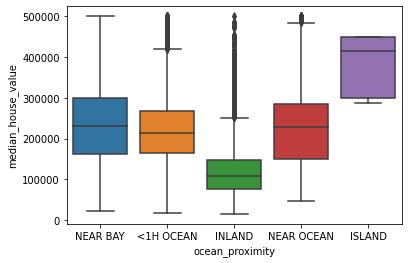

In [74]:
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value')

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

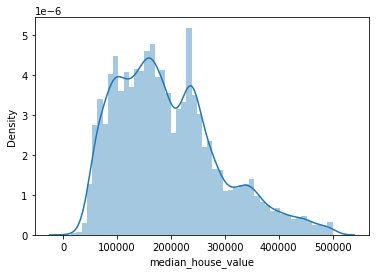

In [79]:
sns.distplot(df['median_house_value'])

### Correlation of all numeric columns

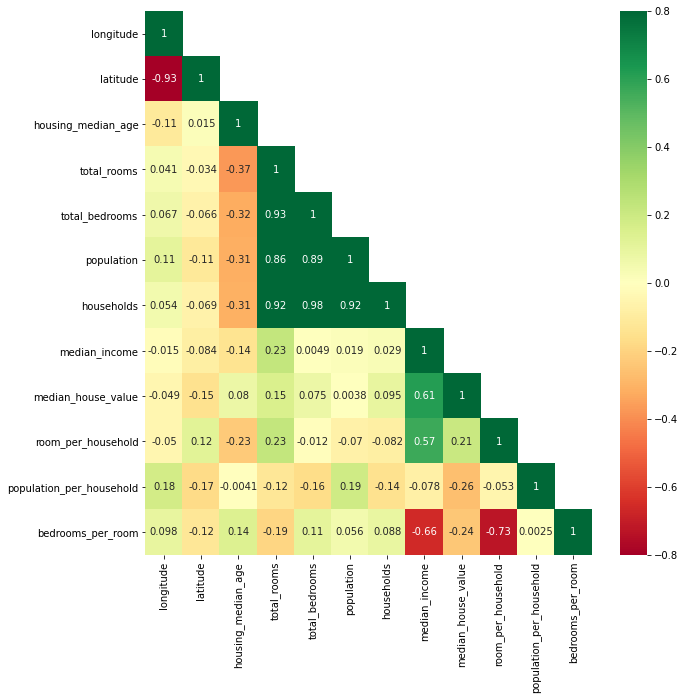

In [80]:
corr_matrix = df.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

# MODELLING

### Feature Engineering

In [7]:
df = pd.get_dummies(df,columns=['ocean_proximity'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19994 non-null  float64
 1   latitude                    19994 non-null  float64
 2   housing_median_age          19994 non-null  float64
 3   total_rooms                 19994 non-null  float64
 4   total_bedrooms              19994 non-null  float64
 5   population                  19994 non-null  float64
 6   households                  19994 non-null  float64
 7   median_income               19994 non-null  float64
 8   median_house_value          19994 non-null  float64
 9   room_per_household          19994 non-null  float64
 10  population_per_household    19994 non-null  float64
 11  bedrooms_per_room           19994 non-null  float64
 12  ocean_proximity_<1H OCEAN   19994 non-null  uint8  
 13  ocean_proximity_INLAND      199

### Features Transformation

In [9]:
from scipy.special import boxcox1p
df['total_rooms']=df['total_rooms'].apply(lambda x: boxcox1p(x,0.25))
df['total_bedrooms']=df['total_bedrooms'].apply(lambda x: boxcox1p(x,0.25))
df['households']=df['households'].apply(lambda x: boxcox1p(x,0.2))
df['population']=df['population'].apply(lambda x: boxcox1p(x,0.3))
df['room_per_household']=df['room_per_household'].apply(lambda x: np.log1p(x)**0.5)
df['bedrooms_per_room']=df['bedrooms_per_room'].apply(lambda x: np.log1p(x)**0.25)
df['median_income']=df['median_income'].apply(lambda x: np.log1p(x)**1.25)
df['population_per_household']=df['population_per_household'].apply(lambda x: np.log1p(x)**1)

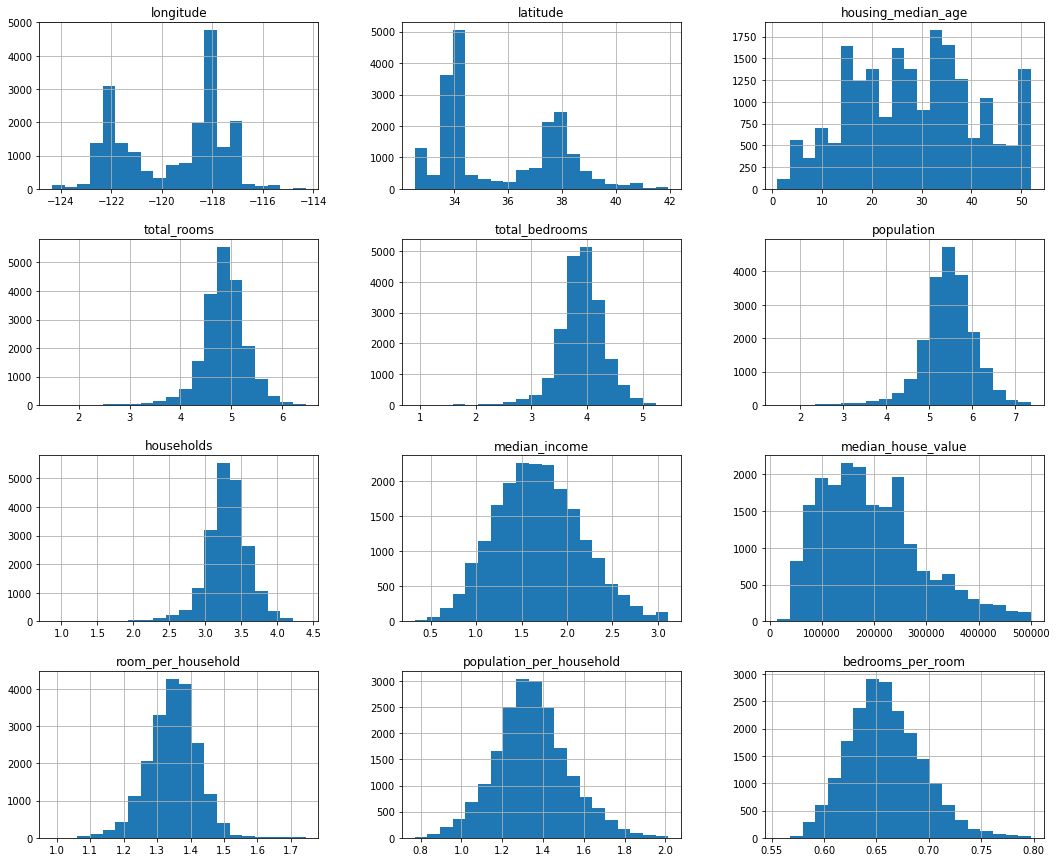

In [22]:
columns = df.columns
df[columns[:12]].hist(figsize=(18,15),bins=20)
plt.show()

### Prepare data Train/Test split

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print('Shape of train dataset: ')
X_train.shape,y_train.shape

Shape of train dataset: 


((15995, 16), (15995,))

In [12]:
print('Shape of test dataset: ')
X_test.shape,y_test.shape

Shape of test dataset: 


((3999, 16), (3999,))

### Function definition

In [19]:
# Dataframe to store all the MAE, R_2 score values for various algorithms
algo_score_col = ['Algo_name','Train MEA','Test MEA','Train R_2','Test R_2']
algo_score = pd.DataFrame(columns=algo_score_col)

### Compute function for MAE (Mean Absolute Error) and R2 score 

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score
def summary_score(model_name,y_train,ypred_train,y_test,ypred_test):
    MAE_train = mean_absolute_error(y_train,ypred_train)
    r2_train = r2_score(y_train,ypred_train)
    MAE_test = mean_absolute_error(y_test,ypred_test)
    r2_test = r2_score(y_test,ypred_test)
    print('Model: ',model_name)
    print('--Result in train and test data set--')
    print('MAE train: ', MAE_train)
    print('MAE test', MAE_test)
    print('R2_score train: ',r2_train)
    print('R2_score test: ', r2_test)
    sum_entry = pd.DataFrame([[model_name,MAE_train,MAE_test,r2_train,r2_test]],columns=algo_score_col)
    return sum_entry 

### Plot True value vs Predict

In [51]:
def plot_true_vs_pred(model_name,y_true,y_pred):
    plt.figure(figsize=(18,8))
    plt.plot(y_true,label='Actual',marker='.',markersize=15)
    plt.plot(y_pred,label='Prediction',marker='.',markersize=15)
    plt.ylabel('Price')
    plt.title('Plot True and prediction value in first 100 observations by' + model_name)
    plt.legend()
    plt.show()

## Regression Modelling

In [25]:
from sklearn.model_selection import cross_val_score

### **Linear regression model**

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)
name = lr.__class__.__name__
algo_score = algo_score.append(summary_score(name,y_train,ypred_train,y_test,ypred_test))
cross_val = cross_val_score(lr,X_train,y_train,cv=4)
print('Cross validation score: ')
print(cross_val)

Model:  LinearRegression
--Result in train and test data set--
MAE train:  45123.062317430085
MAE test 46295.73339858127
R2_score train:  0.5997850559410345
R2_score test:  0.5865907146353717
Cross validation score: 
[0.59979287 0.60298444 0.59659431 0.59472898]


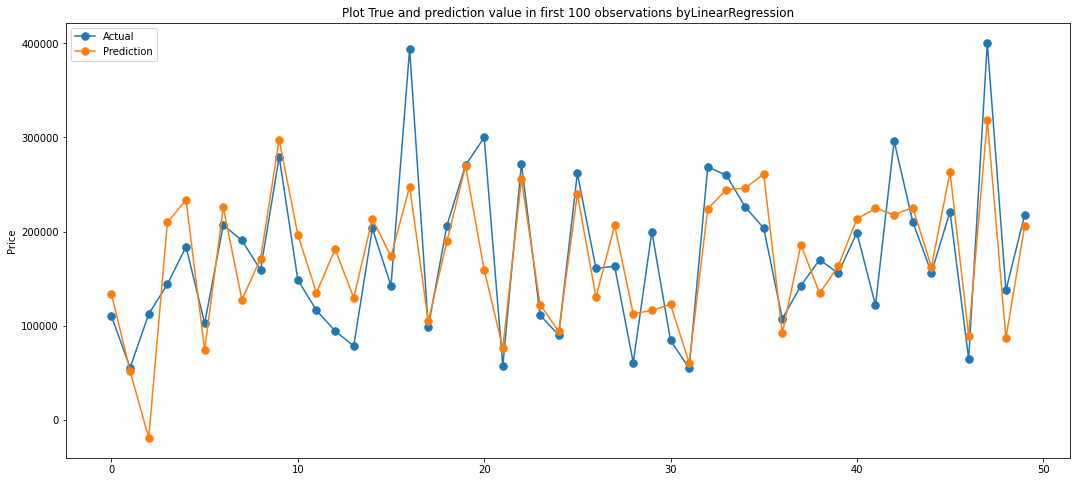

In [52]:
plot_true_vs_pred(name,y_test[:50].values,ypred_test[:50])